In [1]:
pip install word2number

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for word2number: filename=word2number-1.1-py3-none-any.whl size=5588 sha256=b82210f1b5b03825052f3ca6478e743542a20ebf53cc327bad33f8e87370be48
  Stored in directory: c:\users\farooq\appdata\local\pip\cache\wheels\cd\ef\ae\073b491b14d25e2efafcffca9e16b2ee6d114ec5c643ba4f06
Successfully built word2number
Note: you may need to restart the kernel to use updated packages.


In [31]:
from word2number import w2n
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn import linear_model as lm

In [3]:
df=pd.read_csv(r"C:\Users\farooq\Downloads\hiring.csv")
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [23]:
df['experience']=df['experience'].fillna('zero')

In [27]:
df['experience']=w2n.word_to_num(df['experience'])

ValueError: Type of input is not string! Please enter a valid number word (eg. 'two million twenty three thousand and forty nine')

In [29]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


In [33]:
df['test_score(out of 10)']=df['test_score(out of 10)'].fillna(math.floor(df['test_score(out of 10)'].median()))
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


In [35]:
reg= lm.LinearRegression()

In [43]:
reg.fit(df[['experience','test_score(out of 10)','interview_score(out of 10)']],df['salary($)'])

LinearRegression()

In [45]:
reg.coef_

array([2812.95487627, 1845.70596798, 2205.24017467])

In [47]:
reg.intercept_

17737.263464337688

In [49]:
reg.predict([[2,9,6],[12,10,10]])

C:\Users\farooq\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([53205.96797671, 92002.18340611])

In [65]:
d= df.iloc[:,0:3]
y= reg.predict(d)
y

array([52350.0727802 , 45734.35225619, 58312.95487627, 63872.63464338,
       67270.74235808, 61148.47161572, 76069.1411936 , 79241.63027656])

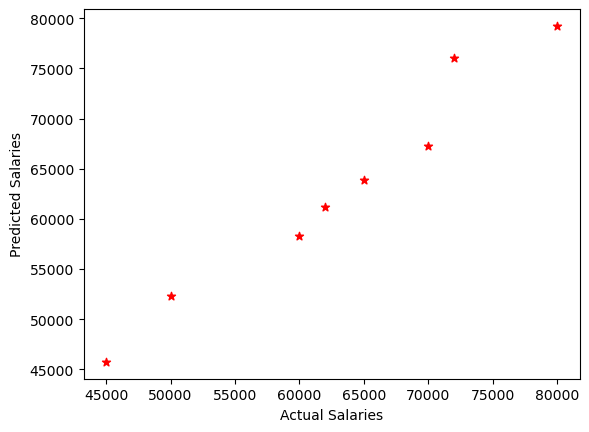

In [63]:
%matplotlib inline
plt.xlabel('Actual Salaries')
plt.ylabel('Predicted Salaries')
plt.scatter(df['salary($)'],y,color='Red',marker='*')